In [1]:
###75.06/95.58 Organización de Datos - 1C 2019
###Trabajo Práctico 1
###Análisis Exploratorio

###Grupo 34: "DataTravellers"
###Integrantes:
###Andrés Pablo Silvestri: 85881 (silvestri.andres@gmail.com)
###Juan Manuel González: 79979 (juanmg0511@gmail.com)
###Patricio Pizzini: 97524 (pizzinipatricio@yahoo.com.ar)
###Fecha de entrega: 22/04/2019

## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
## target_competencia = pd.read_csv('target_competencia.csv')
## RECIÉN VA A SER UTILIZADO EN EL TP2. (COLUMNAS obj_Sc Y obj_St SON 0)

In [3]:
################################################################
## EVENTS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
events= pd.read_csv('../../../data/events.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (EVENTS)
events['wifi'] = events['wifi'].fillna(False).astype(bool)
events['connection_type'] = events['connection_type'].astype('category')
events['trans_id'] = events['trans_id'].astype('category')
events['date'] = pd.to_datetime(events['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
events['mes'] = events['date'].dt.month
events['dia'] = events['date'].dt.day
events['hora'] = events['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
events['nombre_dia'] = events['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
events.loc[events.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
events.loc[events.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
events.loc[events.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
events.loc[events.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
events.loc[events.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
events.loc[events.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
events.loc[events.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DdiasemanaE LOS MESES.
events['nombre_mes'] = ''
events.loc[events.mes == 1, 'nombre_mes'] = 'ENERO'
events.loc[events.mes == 2, 'nombre_mes'] = 'FEBRERO'
events.loc[events.mes == 3, 'nombre_mes'] = 'MARZO'
events.loc[events.mes == 4, 'nombre_mes'] = 'ABRIL'
events.loc[events.mes == 5, 'nombre_mes'] = 'MAYO'
events.loc[events.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
events['hora_madrugada'] = 0
events.loc[((events.hora > -1) & (events.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
events['hora_maniana'] = 0
events.loc[((events.hora > 6) & (events.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
events['hora_almuerzo'] = 0
events.loc[((events.hora > 11) & (events.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
events['hora_tarde'] = 0
events.loc[((events.hora > 13) & (events.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
events['hora_noche'] = 0
events.loc[((events.hora > 18) & (events.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
events['nombre_dia'] = events['nombre_dia'].astype('category')
events['nombre_mes'] = events['nombre_mes'].astype('category')
################################################################
################################################################

In [4]:
################################################################
## CLICKS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
clicks = pd.read_csv('../../../data/clicks.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (CLICKS)
clicks['created'] = pd.to_datetime(clicks['created'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
clicks['mes'] = clicks['created'].dt.month
clicks['dia'] = clicks['created'].dt.day
clicks['hora'] = clicks['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
clicks['nombre_dia'] = clicks['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
clicks.loc[clicks.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
clicks.loc[clicks.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
clicks.loc[clicks.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
clicks.loc[clicks.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
clicks.loc[clicks.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
clicks.loc[clicks.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
clicks.loc[clicks.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
clicks['nombre_mes'] = ''
clicks.loc[clicks.mes == 1, 'nombre_mes'] = 'ENERO'
clicks.loc[clicks.mes == 2, 'nombre_mes'] = 'FEBRERO'
clicks.loc[clicks.mes == 3, 'nombre_mes'] = 'MARZO'
clicks.loc[clicks.mes == 4, 'nombre_mes'] = 'ABRIL'
clicks.loc[clicks.mes == 5, 'nombre_mes'] = 'MAYO'
clicks.loc[clicks.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
clicks['hora_madrugada'] = 0
clicks.loc[((clicks.hora > -1) & (clicks.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
clicks['hora_maniana'] = 0
clicks.loc[((clicks.hora > 6) & (clicks.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
clicks['hora_almuerzo'] = 0
clicks.loc[((clicks.hora > 11) & (clicks.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
clicks['hora_tarde'] = 0
clicks.loc[((clicks.hora > 13) & (clicks.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
clicks['hora_noche'] = 0
clicks.loc[((clicks.hora > 18) & (clicks.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
clicks['nombre_dia'] = clicks['nombre_dia'].astype('category')
clicks['nombre_mes'] = clicks['nombre_mes'].astype('category')
################################################################
################################################################

In [5]:
################################################################
## INSTALLS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
installs = pd.read_csv('../../../data/installs.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (INSTALLS)
installs['kind'] = installs['kind'].astype('category')
installs['user_agent'] = installs['user_agent'].astype('category')
installs['session_user_agent'] = installs['session_user_agent'].astype('category')
installs['created'] = pd.to_datetime(installs['created'], infer_datetime_format=True)
installs['trans_id'] = installs['trans_id'].astype('category')
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
installs['mes'] = installs['created'].dt.month
installs['dia'] = installs['created'].dt.day
installs['hora'] = installs['created'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
installs['nombre_dia'] = installs['created'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
installs.loc[installs.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
installs.loc[installs.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
installs.loc[installs.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
installs.loc[installs.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
installs.loc[installs.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
installs.loc[installs.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
installs.loc[installs.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
installs['nombre_mes'] = ''
installs.loc[installs.mes == 1, 'nombre_mes'] = 'ENERO'
installs.loc[installs.mes == 2, 'nombre_mes'] = 'FEBRERO'
installs.loc[installs.mes == 3, 'nombre_mes'] = 'MARZO'
installs.loc[installs.mes == 4, 'nombre_mes'] = 'ABRIL'
installs.loc[installs.mes == 5, 'nombre_mes'] = 'MAYO'
installs.loc[installs.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
installs['hora_madrugada'] = 0
installs.loc[((installs.hora > -1) & (installs.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
installs['hora_maniana'] = 0
installs.loc[((installs.hora > 6) & (installs.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
installs['hora_almuerzo'] = 0
installs.loc[((installs.hora > 11) & (installs.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
installs['hora_tarde'] = 0
installs.loc[((installs.hora > 13) & (installs.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
installs['hora_noche'] = 0
installs.loc[((installs.hora > 18) & (installs.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
installs['nombre_dia'] = installs['nombre_dia'].astype('category')
installs['nombre_mes'] = installs['nombre_mes'].astype('category')
################################################################
################################################################

In [6]:
################################################################
## AUCTIONS.
################################################################
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
auctions = pd.read_csv('../../../data/auctions.csv')
## TRANSFORMACIÓN DE TIPOS PARA EL CSV (AUCTIONS)
auctions['date'] = pd.to_datetime(auctions['date'], infer_datetime_format=True)
## DIFERENCIAMOS EN TRES COLUMNAS DIFERENTES EL DIA, MES Y AÑO.
auctions['mes'] = auctions['date'].dt.month
auctions['dia'] = auctions['date'].dt.day
auctions['hora'] = auctions['date'].dt.hour
## ARMAMOS UNA COLUMNA PARA EL DÍA DE LA SEMANA COMO NOMBRE.
auctions['nombre_dia'] = auctions['date'].dt.weekday_name
## PONEMOS LOS NOMBRES DE MANERA MÁS PROLIJA PARA LOS GRÁFICOS.
auctions.loc[auctions.nombre_dia.str.contains('Monday', na=False), 'nombre_dia'] = 'LUN'
auctions.loc[auctions.nombre_dia.str.contains('Tuesday', na=False), 'nombre_dia'] = 'MAR'
auctions.loc[auctions.nombre_dia.str.contains('Wednesday', na=False), 'nombre_dia'] = 'MIE'
auctions.loc[auctions.nombre_dia.str.contains('Thursday', na=False), 'nombre_dia'] = 'JUE'
auctions.loc[auctions.nombre_dia.str.contains('Friday', na=False), 'nombre_dia'] = 'VIE'
auctions.loc[auctions.nombre_dia.str.contains('Saturday', na=False), 'nombre_dia'] = 'SAB'
auctions.loc[auctions.nombre_dia.str.contains('Sunday', na=False), 'nombre_dia'] = 'DOM'
## ARMAMOS LOS NOMBRES DE LOS MESES.
auctions['nombre_mes'] = ''
auctions.loc[auctions.mes == 1, 'nombre_mes'] = 'ENERO'
auctions.loc[auctions.mes == 2, 'nombre_mes'] = 'FEBRERO'
auctions.loc[auctions.mes == 3, 'nombre_mes'] = 'MARZO'
auctions.loc[auctions.mes == 4, 'nombre_mes'] = 'ABRIL'
auctions.loc[auctions.mes == 5, 'nombre_mes'] = 'MAYO'
auctions.loc[auctions.mes == 6, 'nombre_mes'] = 'JUNIO'
# ARMAMOS UNA LÓGICA PARA SEGMENTAR LAS FRANJAS HORARIAS.
# MADRUGADA de 00 a 06
auctions['hora_madrugada'] = 0
auctions.loc[((auctions.hora > -1) & (auctions.hora < 7)), 'hora_madrugada'] = 1
# MAÑANA de 07 a 11
auctions['hora_maniana'] = 0
auctions.loc[((auctions.hora > 6) & (auctions.hora < 12)), 'hora_maniana'] = 1
# ALMUERZO de 12 a 13
auctions['hora_almuerzo'] = 0
auctions.loc[((auctions.hora > 11) & (auctions.hora < 14)), 'hora_almuerzo'] = 1
# TARDE de 14 a 18
auctions['hora_tarde'] = 0
auctions.loc[((auctions.hora > 13) & (auctions.hora < 19)), 'hora_tarde'] = 1
# NOCHE de 19 a 23
auctions['hora_noche'] = 0
auctions.loc[((auctions.hora > 18) & (auctions.hora < 24)), 'hora_noche'] = 1
# TRANSFORMAMOS EN CATEGÓRICAS EL DÍA DE LA SEMANA Y EL MES.
auctions['nombre_dia'] = auctions['nombre_dia'].astype('category')
auctions['nombre_mes'] = auctions['nombre_mes'].astype('category')
################################################################
################################################################

Text(27.3614670138889, 0.5, 'Cantidad')

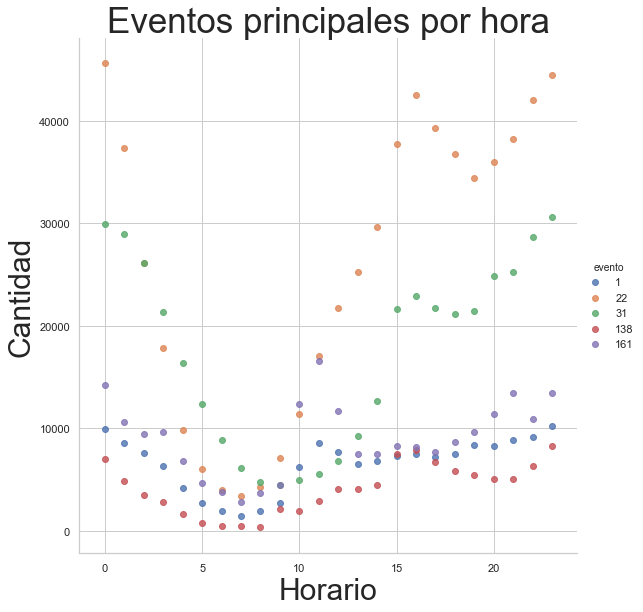

In [7]:
##3 - Análisis sobre los horarios y la actividad
#3.1 - ¿Cuáles son los horarios en los que ocurren los eventos más frecuentes?
# eventos principales
#22     618228
#31     417070
#161    217846
#1      157812
#138    100039
eventosID_relevantes = list([22,31,161,1,138])
eventos_top5 = events[events["event_id"].isin(eventosID_relevantes)]

crecimiento_eventos = eventos_top5.groupby(['event_id','hora']).count()[['date']].reset_index()
#ax = sns.lineplot(x="hora", y="date", hue="event_id", markers=True, dashes=False, data=crecimiento_eventos)
#ax = sns.lineplot(x="hora", y="date",hue="event_id", data=crecimiento_eventos)
#ax = sns.lineplot(x="hora", y="date", hue="event_id", err_style="bars", ci=68, data=crecimiento_eventos)

# Tamaño para hojas A4.
crecimiento_eventos['evento'] = crecimiento_eventos['event_id']
sns.lmplot(x='hora', y='date', hue='evento', data=crecimiento_eventos, fit_reg=False, size=8)
ax = plt.gca()
ax.set_title("Eventos principales por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(25.189962022569446, 0.5, 'Cantidad')

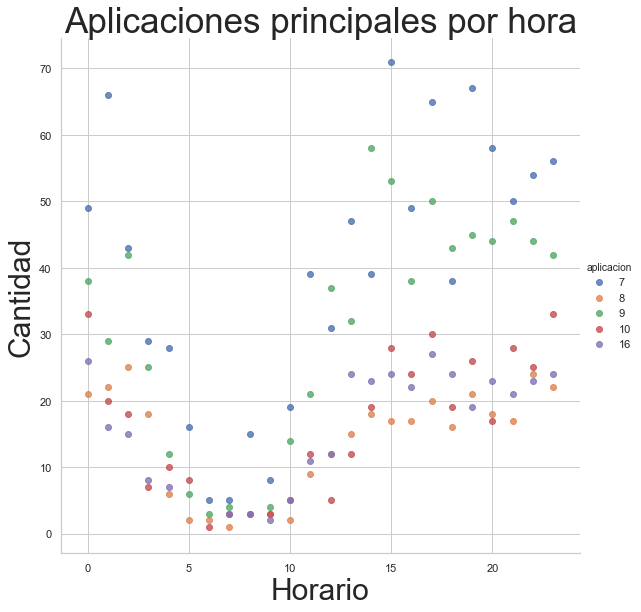

In [8]:
#3.2 - ¿Cuáles son los horarios en los que se suelen instalar las aplicaciones principales?
installs_hora_madrugada = installs[installs['hora_madrugada'] == 1]
installs_hora_maniana = installs[installs['hora_maniana'] == 1]
installs_hora_almuerzo = installs[installs['hora_almuerzo'] == 1]
installs_hora_tarde = installs[installs['hora_tarde'] == 1]
installs_hora_noche = installs[installs['hora_noche'] == 1]

installs_top5 = installs[((installs['application_id'] == 7) | (installs['application_id'] == 9) | (installs['application_id'] == 10) | (installs['application_id'] == 16) | (installs['application_id'] == 8))]
installs_top5.head()
crecimiento_installs_dleng = installs_top5.groupby(['device_language']).count()[['attributed']].reset_index()
crecimiento_installs_dleng = crecimiento_installs_dleng[crecimiento_installs_dleng['attributed'] >200]
crecimiento_installs_dleng
installs_top5['implicit'].value_counts()

crecimiento_installs = installs_top5.groupby(['application_id','hora']).count()[['attributed']].reset_index()
crecimiento_installs['aplicacion'] = crecimiento_installs['application_id']
sns.lmplot(x='hora', y='attributed', hue='aplicacion', data=crecimiento_installs, fit_reg=False, size=8)
ax = plt.gca()
ax.set_title("Aplicaciones principales por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(27.33476888020833, 0.5, 'Cantidad')

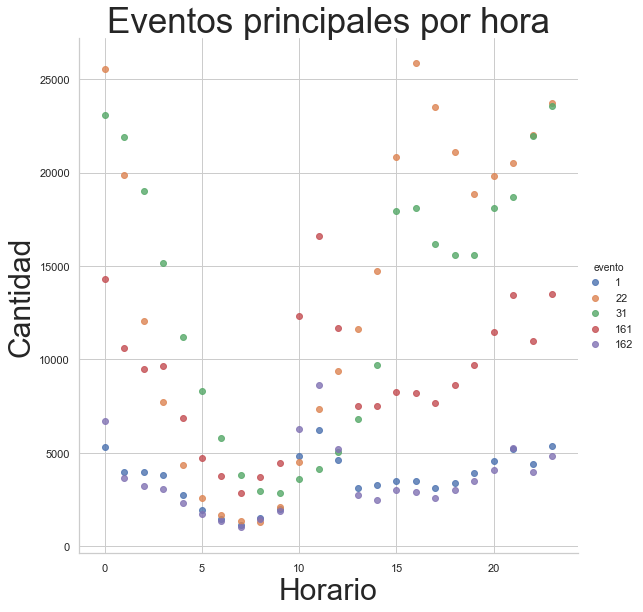

In [9]:
#3.3 - ¿Cuáles son los horarios en los que ocurren eventos en las aplicaciones más populares?
# Los eventos principales para las 5 aplicaciones más instaladas.
#events_top5['application_id'].value_counts()
#7     947
#9     731
#10    389
#16    362
#8     328
aplicaciones_relevantes = list([7,9,10,16,8])
events_topAplicaciones_5 = events[events['application_id'].isin(aplicaciones_relevantes)]
events_topAplicaciones_5['application_id'].value_counts()
events_top5 = events_topAplicaciones_5[( (events_topAplicaciones_5['event_id'] == 22) | (events_topAplicaciones_5['event_id'] == 80) | (events_topAplicaciones_5['event_id'] == 81) | (events_topAplicaciones_5['event_id'] == 1) | (events_topAplicaciones_5['event_id'] == 513) )]
events_top5['event_id'].value_counts()

#66     325696
#64     259084
#145    252431
#63     181555
#103    137513
eventos_relevantes = list([66,64,145,63,103])
events_max5 = events[events['application_id'].isin(eventos_relevantes)]
events_max5['application_id'].value_counts()
events_max5['event_id'].value_counts()
#22     322334
#31     309187
#161    217846
#1       86749
#162     84898
eventosid_relevantes = list([22,31,161,1,162])
events_max5 = events_max5[events_max5['event_id'].isin(eventosid_relevantes)]
events_max5['event_id'].value_counts()

crecimiento_eventos = events_max5.groupby(['event_id','hora']).count()[['date']].reset_index()
crecimiento_eventos['evento'] = crecimiento_eventos['event_id']
sns.lmplot(x='hora', y='date', hue='evento', data=crecimiento_eventos, fit_reg=False, size=8)
ax = plt.gca()
ax.set_title("Eventos principales por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0, 0.5, 'Cantidad')

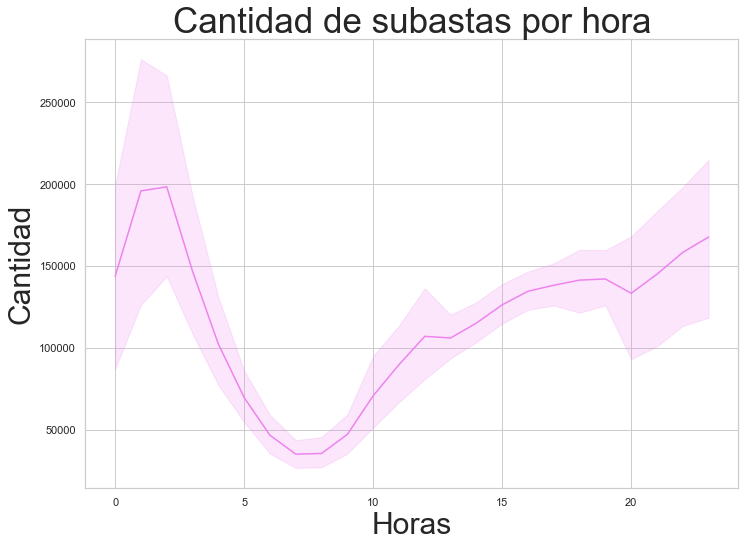

In [10]:
#3.4 - ¿Cómos se distribuyen las subastas a través de las horas del día?
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

auctionsASD = auctions.groupby(['nombre_dia','hora']).count()[['device_id']].reset_index()
ax = sns.lineplot(x="hora", y="device_id", data=auctionsASD, color='violet')
plt.gca()
ax.set_title("Cantidad de subastas por hora", fontsize=35)
ax.set_xlabel("Horas",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0, 0.5, 'Cantidad')

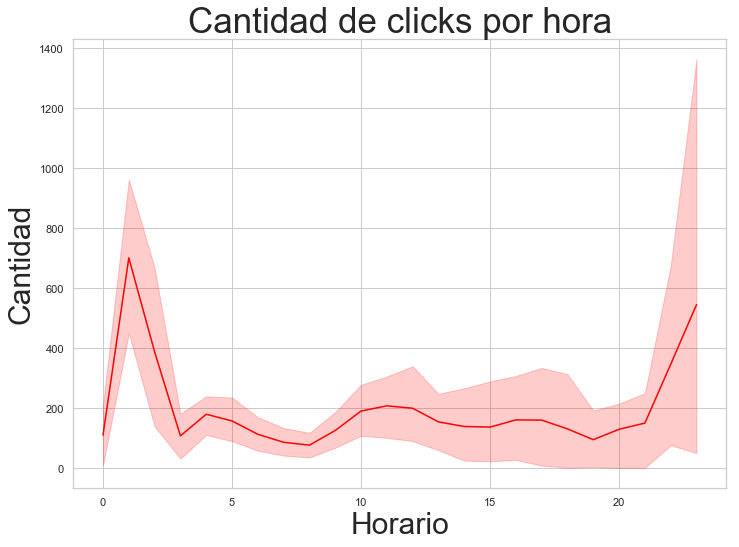

In [11]:
#3.5 - ¿Cómos se distribuyen los clicks a través de las horas del día?
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

clicksASD = clicks.groupby(['nombre_dia','hora']).count()[['advertiser_id']].reset_index()
sns.lineplot(x="hora", y="advertiser_id", data=clicksASD, color='red')
ax = plt.gca()
ax.set_title("Cantidad de clicks por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0, 0.5, 'Cantidad')

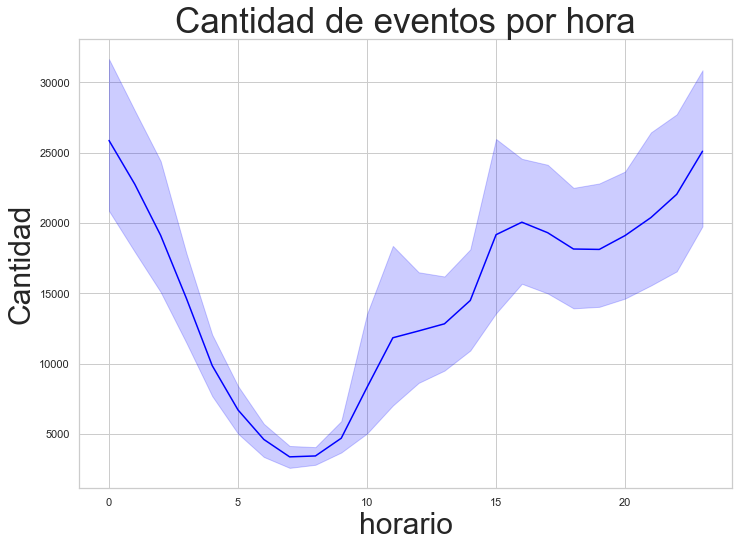

In [12]:
#3.6 - ¿Cómos se distribuyen los eventos a través de las horas del día?
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

eventsASD = events.groupby(['nombre_dia','hora']).count()[['event_id']].reset_index()
sns.lineplot(x="hora", y="event_id", data=eventsASD, color='blue')
ax = plt.gca()
ax.set_title("Cantidad de eventos por hora", fontsize=35)
ax.set_xlabel("horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0, 0.5, 'Cantidad')

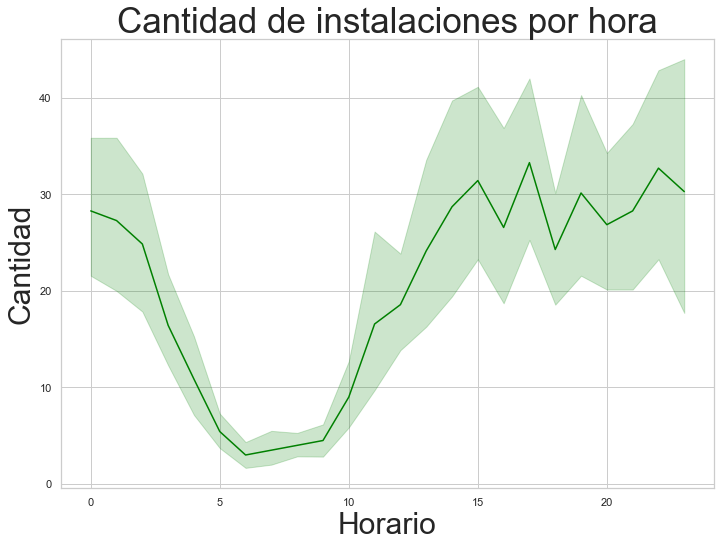

In [13]:
#3.7 - ¿Cómos se distribuyen las instalaciones a través de las horas del día?
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

installsASD = installs.groupby(['nombre_dia','hora']).count()[['application_id']].reset_index()
sns.lineplot(x="hora", y="application_id", data=installsASD, color='green')
ax = plt.gca()
ax.set_title("Cantidad de instalaciones por hora", fontsize=35)
ax.set_xlabel("Horario",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

Text(0, 0.5, 'Cantidad de sucesos')

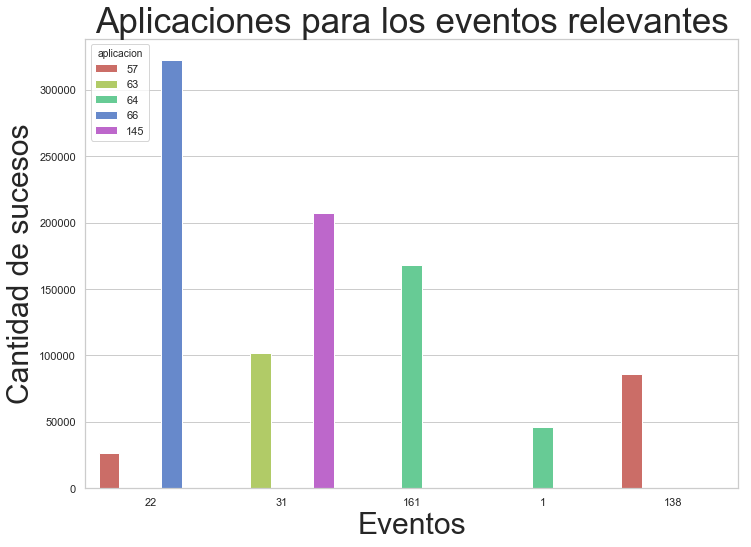

In [14]:
##4 - Análisis sobre cantidades en general
#4.1 - ¿Cuáles son las aplicaciones más relevantes en el marco de los eventos con más apariciones?
events['event_id'].value_counts()
# eventos principales
#22     618228
#31     417070
#161    217846
#1      157812
#138    100039
eventos_relevantes = list([22,31,161,1,138])
topEventos = events[events['event_id'].isin(eventos_relevantes)]
topEventos['event_id'].value_counts()

topEventos['application_id'].value_counts()
# aplicaciones principales para los eventos principales.
#66     322334
#64     214353
#145    207479
#57     112246
#63     101708
aplicaciones_eventos_relevantes = list([66,64,145,57,63])
topAplicaciones_topEventos_5 = topEventos[topEventos['application_id'].isin(aplicaciones_eventos_relevantes)]
topAplicaciones_topEventos_5['evento'] = topAplicaciones_topEventos_5['event_id']
topAplicaciones_topEventos_5['aplicacion'] = topAplicaciones_topEventos_5['application_id']
topAplicaciones_topEventos_5['application_id'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="evento", hue="aplicacion", data=topAplicaciones_topEventos_5, palette="hls", order=[22,31,161,1,138])
g.set_title("Aplicaciones para los eventos relevantes", fontsize=35)
g.set_xlabel("Eventos", fontsize=30)
g.set_ylabel("Cantidad de sucesos", fontsize=30)

Text(0, 0.5, 'Cantidad de eventos')

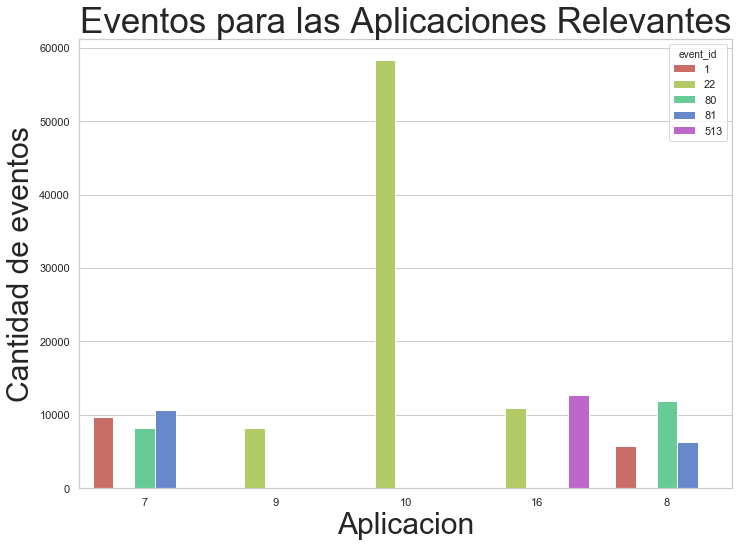

In [15]:
#4.2 - ¿Cuáles son los eventos más registrados en el marco de las aplicaciones más populares?
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="application_id", hue="event_id", data=events_top5, palette="hls", order=[7,9,10,16,8])
g.set_title("Eventos para las Aplicaciones Relevantes", fontsize=35)
g.set_xlabel("Aplicacion", fontsize=30)
g.set_ylabel("Cantidad de eventos", fontsize=30)

Text(81.8, 0.5, 'Horario')

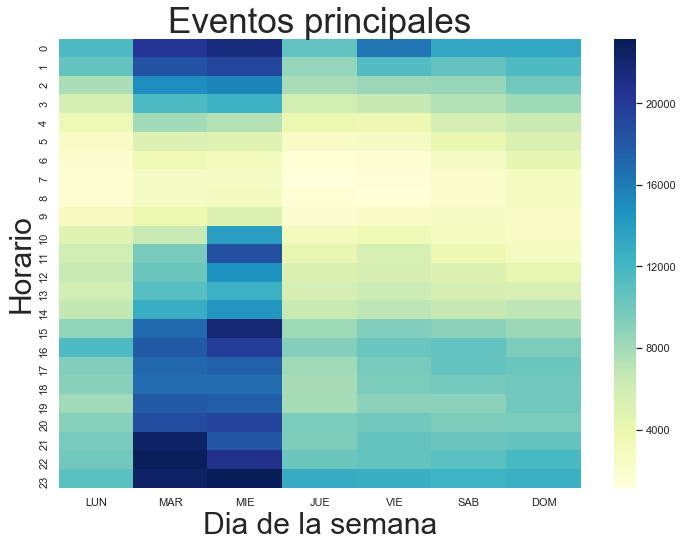

In [16]:
#4.3 - ¿Cómo se distribuye la ejecución de los eventos principales a lo largo de la semana?
eventosID_relevantes = list([22,31,161,1,138])
# eventos principales
#22     618228
#31     417070
#161    217846
#1      157812
#138    100039
df_heat = events[events["event_id"].isin(eventosID_relevantes)].groupby(["hora", "nombre_dia"])["event_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='event_id', aggfunc='sum')
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Eventos principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

Text(81.8, 0.5, 'Horario')

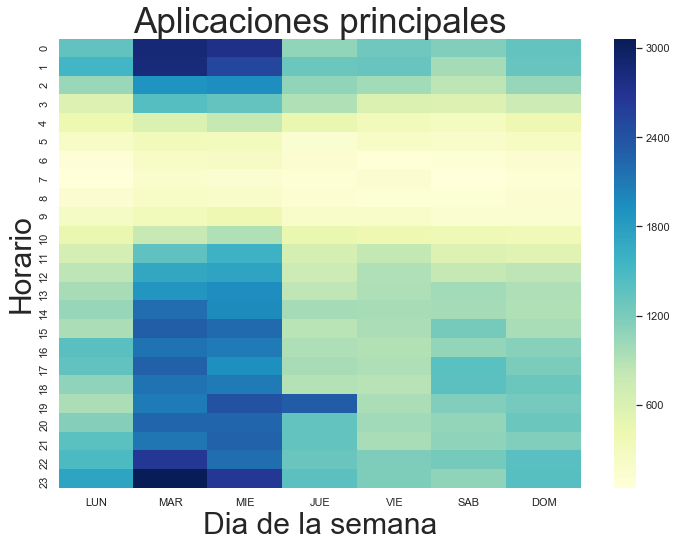

In [17]:
#4.4 - ¿Cómo se distribuye la ejecución de los eventos para las aplicaciones más utilizadas a lo largo de la semana?
aplicaciones_relevantes = list([7,9,10,16,8])
events_top = events[events['application_id'].isin(aplicaciones_relevantes)]

df_heat = events_top.groupby(["hora", "nombre_dia"])["application_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='application_id', aggfunc='sum')

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Aplicaciones principales", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

Text(0, 0.5, 'Cantidad de instalaciones')

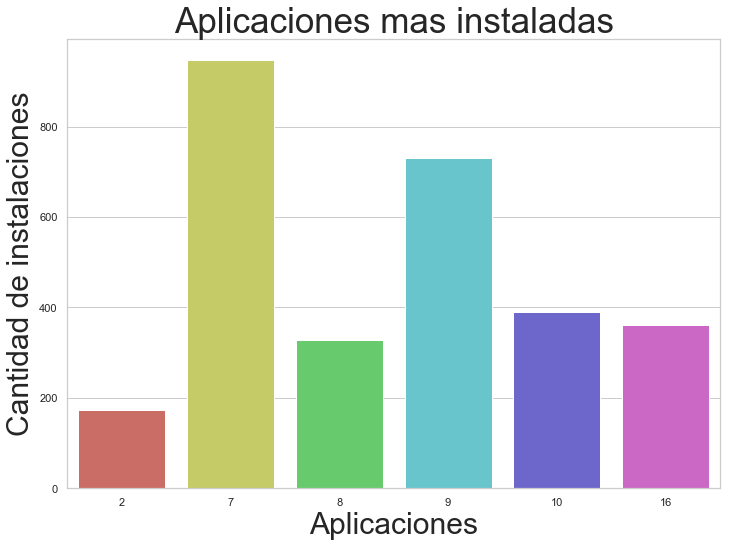

In [18]:
#4.5 - ¿Cuáles son las aplicaciones más instaladas?
## GRAFICAMOS LAS APLICACIONES MAS INSTALADAS.
#installs_top['application_id'].value_counts()
#7     947
#9     731
#10    389
#16    362
#8     328
#2     174

aplicaciones_mas_instaladas = list([7, 9, 10, 16, 8, 2])
installs_top = installs[installs['application_id'].isin(aplicaciones_mas_instaladas)]
installs_top['application_id'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="application_id", data=installs_top, palette="hls")
g.set_title("Aplicaciones mas instaladas", fontsize=35)
g.set_xlabel("Aplicaciones", fontsize=30)
g.set_ylabel("Cantidad de instalaciones", fontsize=30)

Text(81.8, 0.5, 'Horario')

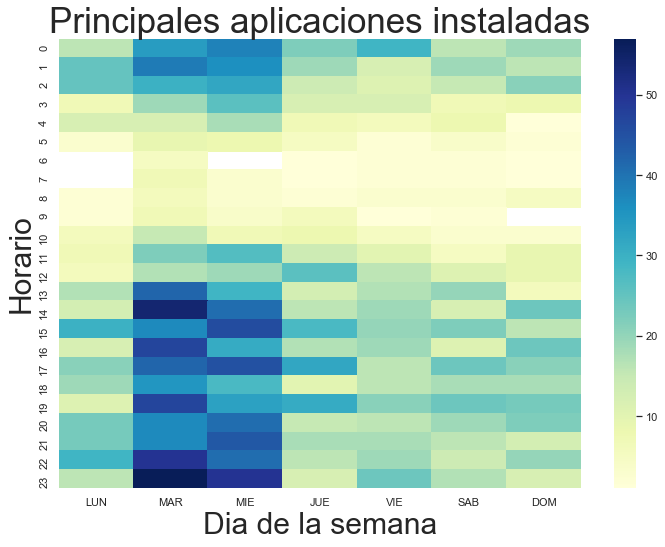

In [19]:
#4.6 - ¿Para las aplicaciones más instaladas, cómo se distribuye la cantidad en la semana?
aplicaciones_relevantes = list([7,9,10,16,8,2])
installs_top = installs[installs['application_id'].isin(aplicaciones_relevantes)]

df_heat = installs_top.groupby(["hora", "nombre_dia"])["application_id"].size().reset_index()
df_heat['nombre_dia'] = pd.Categorical(df_heat['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])

df_heat.index = pd.CategoricalIndex(df_heat.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
df_heat.sortlevel(level=0, inplace=True)

for_heatmap = df_heat.pivot_table(index='hora', columns='nombre_dia', values='application_id', aggfunc='sum')

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Principales aplicaciones instaladas", fontsize=35)
g.set_xlabel("Dia de la semana",fontsize=30)
g.set_ylabel("Horario", fontsize=30)

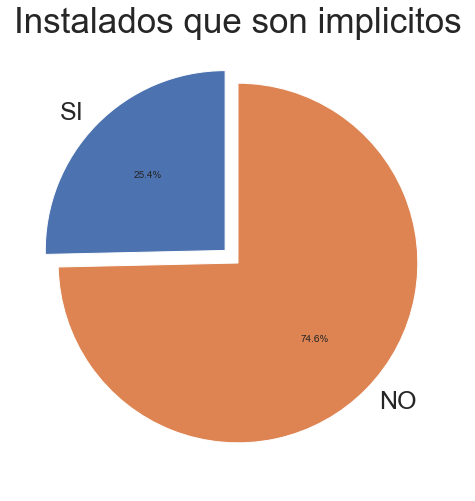

In [20]:
#4.8 - ¿Cuál es la proporción de aplicaciones instaladas que son implícitas?
## OBTENEMOS AQUELLOS EVENTOS QUE TIENEN UN NABVEGADOR ASIGNADOS.
si_implicit = installs[installs['implicit'] == True]
no_implicit = installs[installs['implicit'] != True]
## SOLO HA BASRTADO DIFERENCIARLOS EN CHROME O EN OTROS PUESTO QUE LOS DEMÁS SON DESPRECIABLES.
sizes = [si_implicit.implicit.count(), no_implicit.implicit.count()]
nombres = ['SI', 'NO']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Instalados que son implicitos', fontsize=35)
patches, texts, autotexts = plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.1, 0))
texts[0].set_fontsize(25)
texts[1].set_fontsize(25)
plt.show()

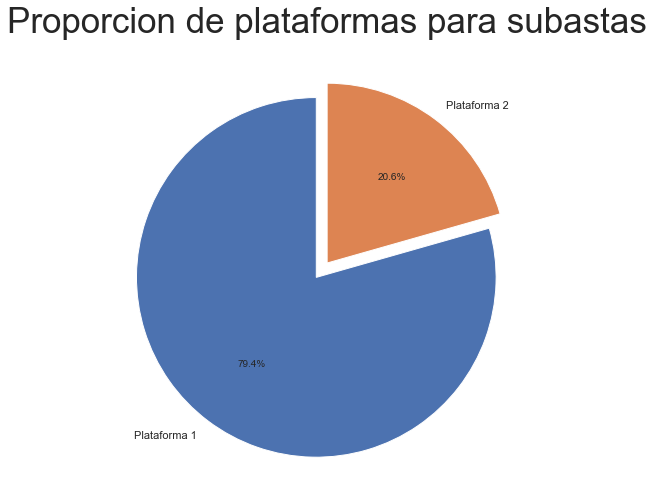

In [21]:
##5 - Análisis sobre las subastas
#5.2 - ¿Cúal es la proporción de plataformas usadas para las subastas?
#Obtenemos las cantidades por plataforma
plataforma1 = (auctions[auctions['platform'] == 1]).platform.count()
plataforma2 = auctions[auctions['platform'] == 2].platform.count()

#Solo tenemos 2 plataformas que no sabemos los nombres, solo un ID.
sizes = [plataforma1, plataforma2]
nombres = ['Plataforma 1','Plataforma 2']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Proporcion de plataformas para subastas', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.1, 0))
plt.show()

Text(0, 0.5, 'Cantidad de subastas')

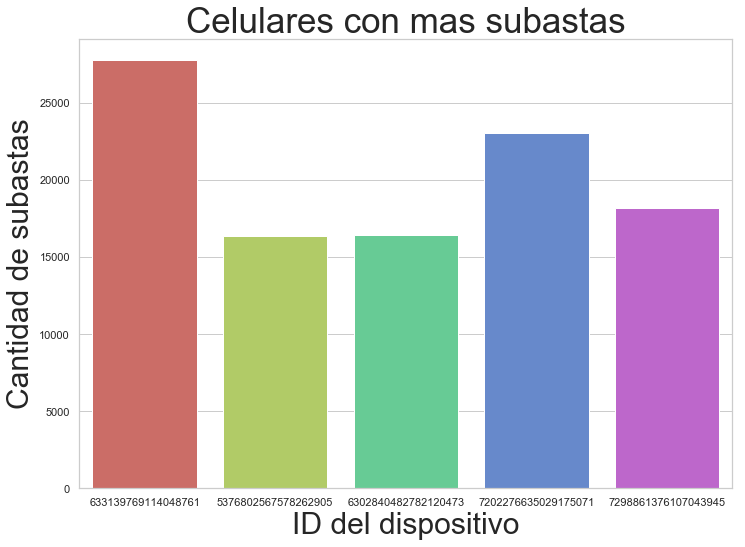

In [22]:
#5.3 - ¿Cuáles fueron los celulares sobre los que se hicieron más subastas?
#auctions['device_id'].value_counts()
#633139769114048761     27762
#7202276635029175071    23055
#7298861376107043945    18188
#6302840482782120473    16400
#5376802567578262905    16367
device_tops = list([633139769114048761, 7202276635029175071, 6302840482782120473, 7298861376107043945, 5376802567578262905])

auctions_top = auctions[(auctions['device_id'].isin(device_tops))]

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="device_id", data=auctions_top, palette="hls")
g.set_title("Celulares con mas subastas", fontsize=35)
g.set_xlabel("ID del dispositivo", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

Text(0, 0.5, 'Cantidad de subastas')

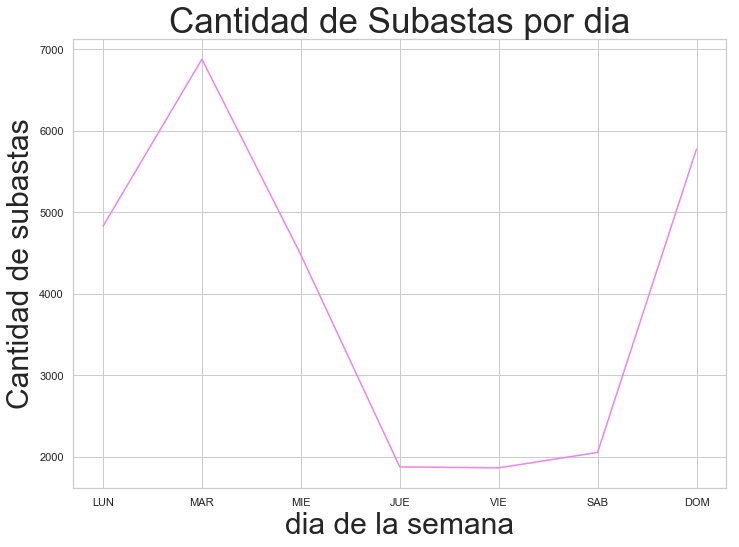

In [23]:
device1 = list([633139769114048761])
auctions1 = auctions[(auctions['device_id'].isin(device1))]
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

auctions1 = auctions1.groupby('nombre_dia').count()[['device_id']].reset_index()

auctions1['nombre_dia'] = pd.Categorical(auctions1['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
auctions1.index = pd.CategoricalIndex(auctions1.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
auctions1.sortlevel(level=0, inplace=True)

g = sns.lineplot(x="nombre_dia", y="device_id", data=auctions1, color='violet')
g.set_title("Cantidad de Subastas por dia", fontsize=35)
g.set_xlabel("dia de la semana", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

Text(0, 0.5, 'Cantidad de subastas')

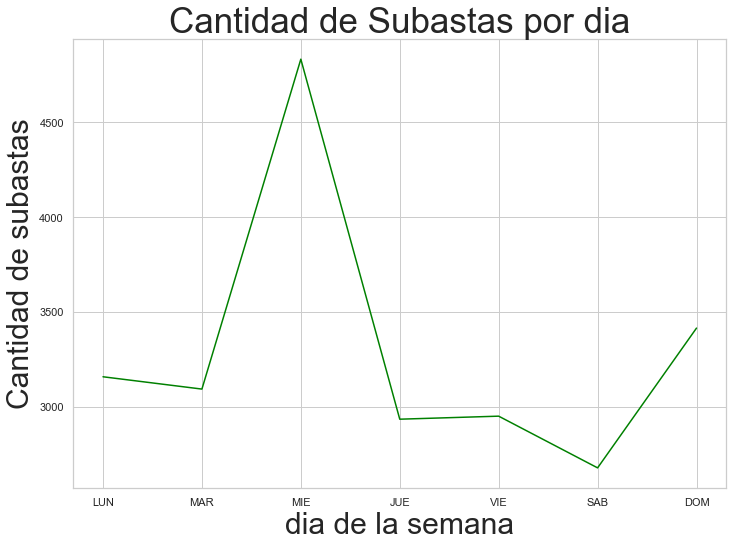

In [24]:
device2 = list([7202276635029175071])
auctions2 = auctions[(auctions['device_id'].isin(device2))]
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

auctions2['nombre_dia'] = pd.Categorical(auctions2['nombre_dia'], categories=['LUN','MAR','MIE','JUE','VIE','SAB', 'DOM'])
auctions2.index = pd.CategoricalIndex(auctions2.index, categories= ["LUN", "MAR", "MIE", "JUE", "VIE", "SAB", "DOM"])
auctions2.sortlevel(level=0, inplace=True)

auctions2 = auctions2.groupby('nombre_dia').count()[['device_id']].reset_index()
g = sns.lineplot(x="nombre_dia", y="device_id", data=auctions2, color='green')
g.set_title("Cantidad de Subastas por dia", fontsize=35)
g.set_xlabel("dia de la semana", fontsize=30)
g.set_ylabel("Cantidad de subastas", fontsize=30)

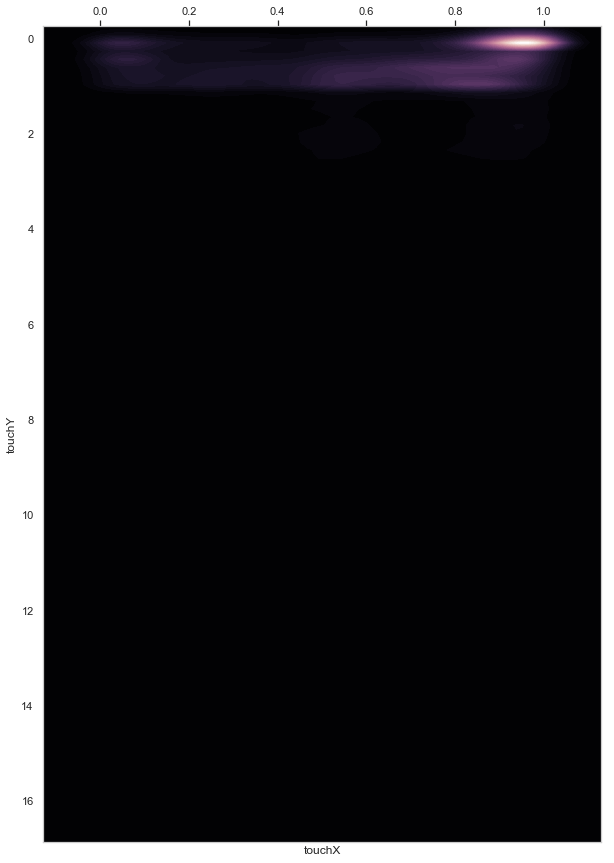

In [8]:
##6 - Análisis sobre el comportamiento de los usuarios
#6.1 - ¿Cuál es la distribución de clicks en la pantalla?
clicks['source_id'].value_counts()
source_relevantes = list([0,1,6,5,2])
clicks_top = clicks[clicks['source_id'].isin(source_relevantes)]
clicks_top['source_id'].value_counts()
clicks_top = clicks_top[clicks_top['touchX'].notnull()]
clicks_top = clicks_top[clicks_top['touchY'].notnull()]

f, ax = plt.subplots(figsize=(10, 15))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
ax.invert_yaxis()
ax.xaxis.set_ticks_position('top')
sns.kdeplot(clicks_top.touchX, clicks_top.touchY, cmap=cmap, n_levels=60, shade=True)

Text(0, 0.5, 'Cantidad')

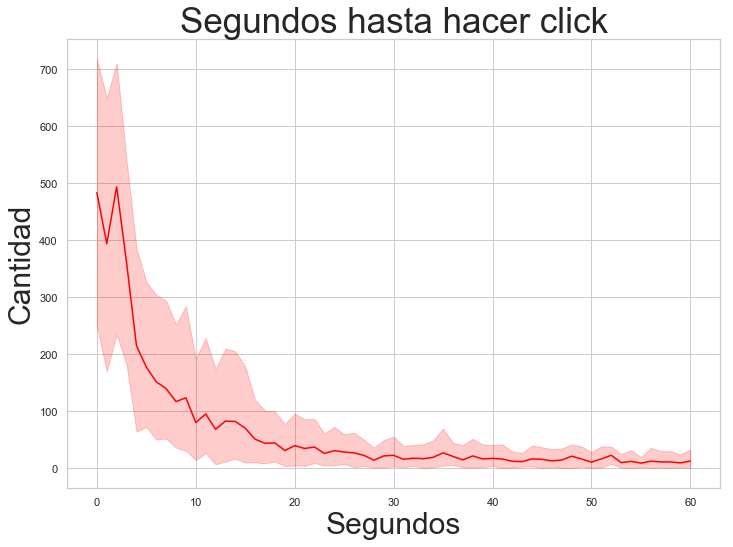

In [15]:
#6.2 - ¿Cuánto tiempo tarda un usuario en hacer click en la pantalla?
clicks['timeToClick'].value_counts()
clicks_group = clicks.groupby('timeToClick').count()[['advertiser_id']].reset_index()

clicks['secondsToClick'] = np.floor(clicks['timeToClick'])
clicks = clicks[clicks['secondsToClick'] < 61.0]
clicks['secondsToClick'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

clicksASD = clicks.groupby(['source_id','secondsToClick']).count()[['advertiser_id']].reset_index()
sns.lineplot(x="secondsToClick", y="advertiser_id", data=clicksASD, color='red')
ax = plt.gca()
ax.set_title("Segundos hasta hacer click", fontsize=35)
ax.set_xlabel("Segundos",fontsize=30)
ax.set_ylabel("Cantidad", fontsize=30)

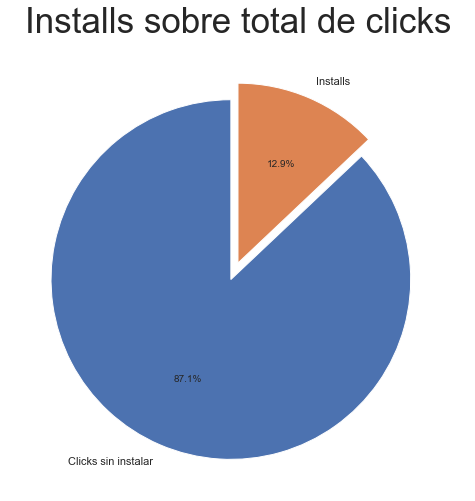

In [7]:
#6.3 - ¿Cuál es la proporción de installs sobre el total de clicks?
#Sabiendo que se instalaron que de los 26351 clicks, 3412 fueron installs
installs_totales = installs['created'].count()
clicks_sin_installs = clicks['created'].count() - installs_totales

sizes = [clicks_sin_installs, installs_totales]
nombres = ['Clicks sin instalar','Installs']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Installs sobre total de clicks', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.1, 0))
plt.show()

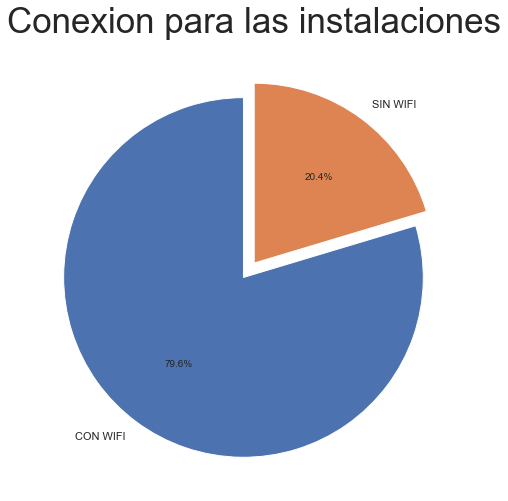

In [9]:
#6.4 - ¿Cuál es la proporción de installs realizados con conexión Wi-Fi?
##Obtenemos cuantas instalaciones se hicieron por wifi y cuantas no
wifi_si = installs[installs['wifi'] == True].wifi.count()
wifi_no = installs[installs['wifi'] == False].wifi.count()

sizes = [wifi_si, wifi_no]
nombres = ['CON WIFI','SIN WIFI']

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Conexion para las instalaciones', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, startangle=90, explode=(0.1, 0))
plt.show()

Text(0, 0.5, 'Ciudades')

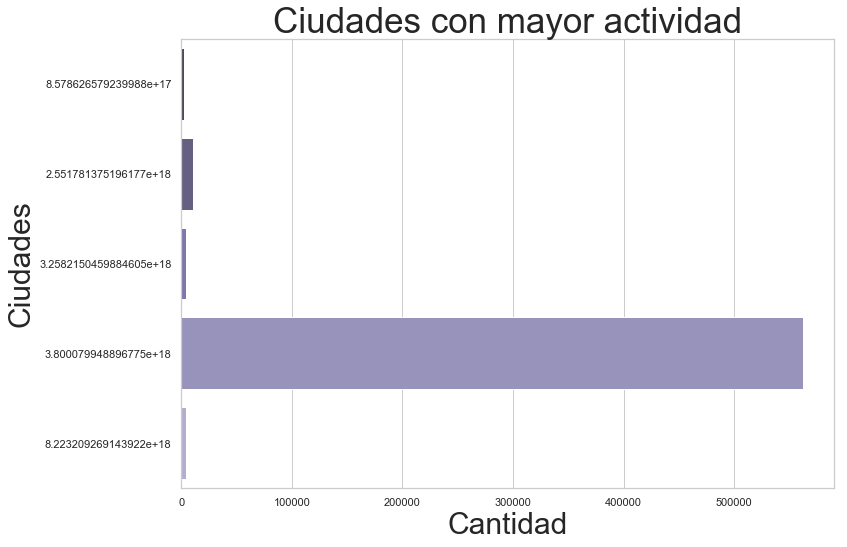

In [10]:
#7 - Análisis demográfico y características generales de los datos
##7.1 - ¿Cuáles son las ciudades más populares en las que se registran eventos?
sns.set(style="whitegrid", color_codes=True)
# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = events['device_city'].value_counts().head(5)
pal = sns.color_palette("Purples_d", len(data))
rank = data.argsort().argsort()
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Ciudades con mayor actividad", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Ciudades", fontsize=30)

Text(0, 0.5, 'Cantidad de clicks')

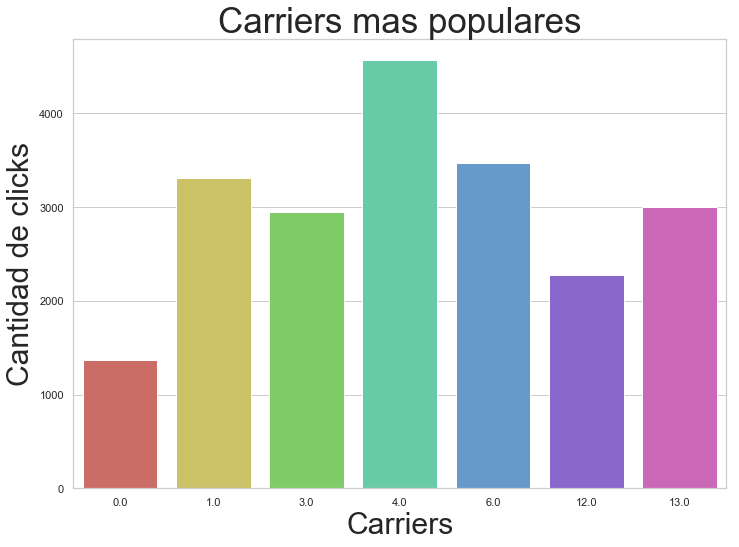

In [11]:
#7.2 - ¿Cuáles son los carriers más populares?
clicks_top['carrier_id'].value_counts()
#4.0     4569
#6.0     3474
#1.0     3307
#13.0    2998
#3.0     2944
#12.0    2273
#0.0     1368

carrier_tops = list([4,6,1,13,3,12,0])
clicks_top = clicks[clicks['carrier_id'].isin(carrier_tops)]
clicks_top['carrier_id'].value_counts()

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

g = sns.countplot(x="carrier_id", data=clicks_top, palette="hls")
g.set_title("Carriers mas populares", fontsize=35)
g.set_xlabel("Carriers", fontsize=30)
g.set_ylabel("Cantidad de clicks", fontsize=30)

Text(0, 0.5, 'Marcas')

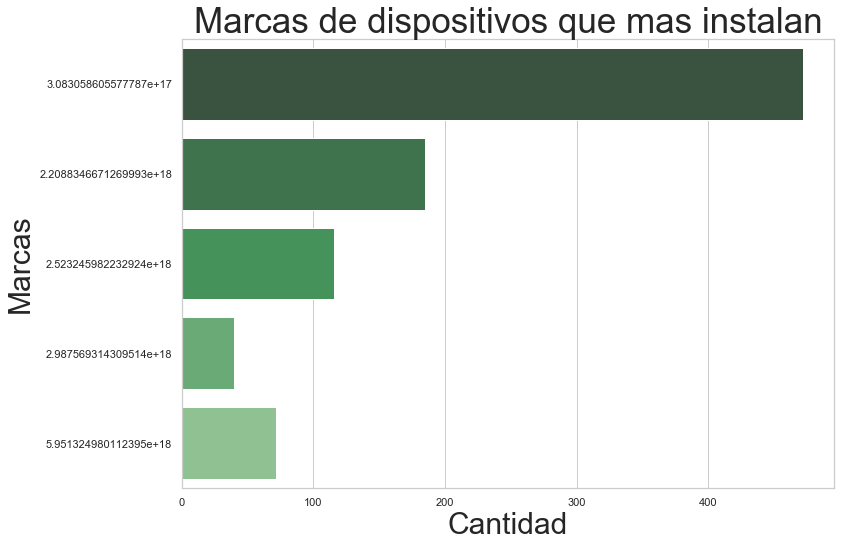

In [12]:
#7.3 - ¿Cuáles son las marcas de dispositivos que más instalaron?
data = events['device_brand'].value_counts().head(5)
sns.set(style="whitegrid", color_codes=True)

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = installs['device_brand'].value_counts().head(5)
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Marcas de dispositivos que mas instalan", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Marcas", fontsize=30)

Text(0, 0.5, 'Modelos')

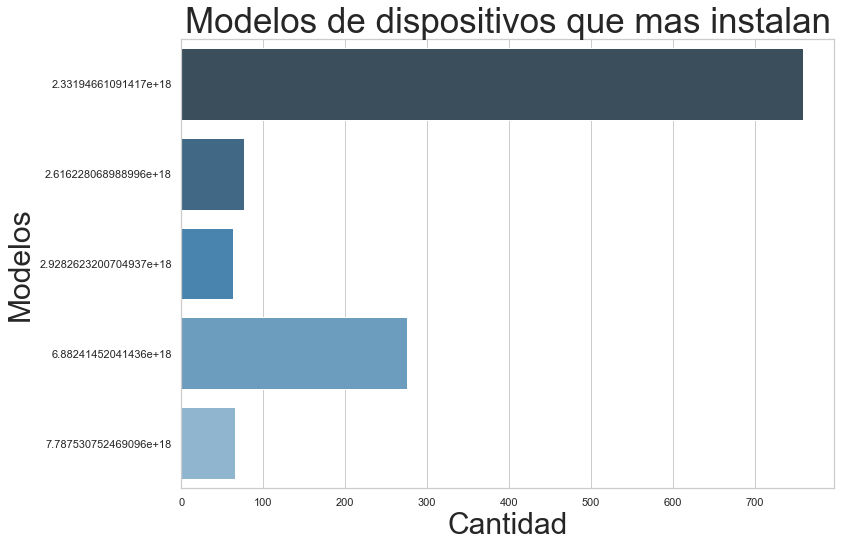

In [13]:
#7.4 - ¿Cuáles son los modelos de dispositivos que más instalaron?
events["device_model"].value_counts()

sns.set(style="whitegrid", color_codes=True)

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = installs['device_model'].value_counts().head(5)

pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Modelos de dispositivos que mas instalan", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Modelos", fontsize=30)

Text(0, 0.5, 'Lenguajes')

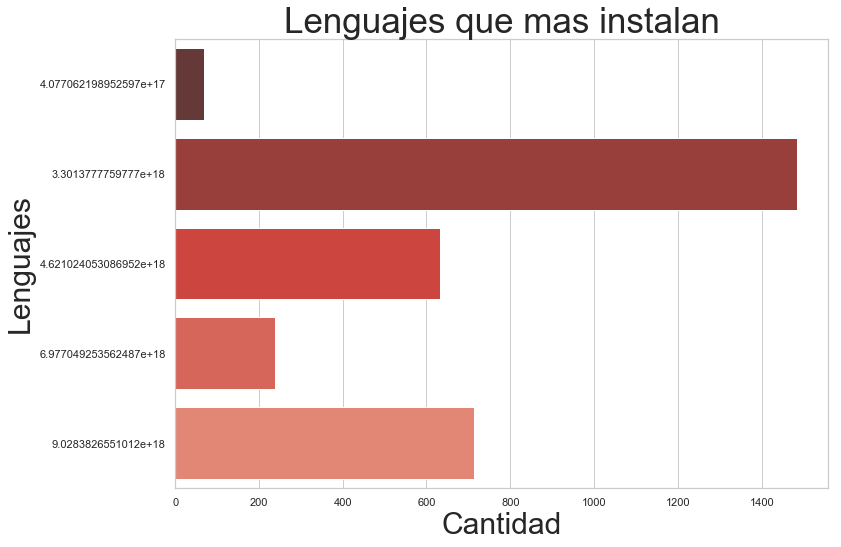

In [14]:
#7.5 - ¿Qué lenguajes tenían los dispositivos que más instalaron?
sns.set(style="whitegrid", color_codes=True)

# Tamaño para hojas A4.
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

data = installs['device_language'].value_counts().head(5)
pal = sns.color_palette("Reds_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g = sns.barplot(x=data, y=data.index, palette=np.array(pal[::-1])[rank], orient = 'h')

g.set_title(u"Lenguajes que mas instalan", fontsize=35)
g.set_xlabel(u"Cantidad", fontsize=30)
g.set_ylabel(u"Lenguajes", fontsize=30)